##  Heart Attack Prediction - Advanced EDA & Modeling 

### 1. Imports and Load Cleaned Data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# --- Load Data ---
file_path = '../data/processed/cleaned_heart_data.csv'
try:
    df = pd.read_csv(file_path)
    print("Cleaned data loaded successfully.")
except FileNotFoundError:
    print(f"ERROR: The file {file_path} was not found. Please run the first notebook to generate it.")

df.head()

Cleaned data loaded successfully.


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 2. Cholesterol vs. Heart Disease

C:\Users\ThapeloMasebe\AppData\Local\Temp\ipykernel_41100\979437029.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y='chol', data=df, palette='pastel', inner='quartile')


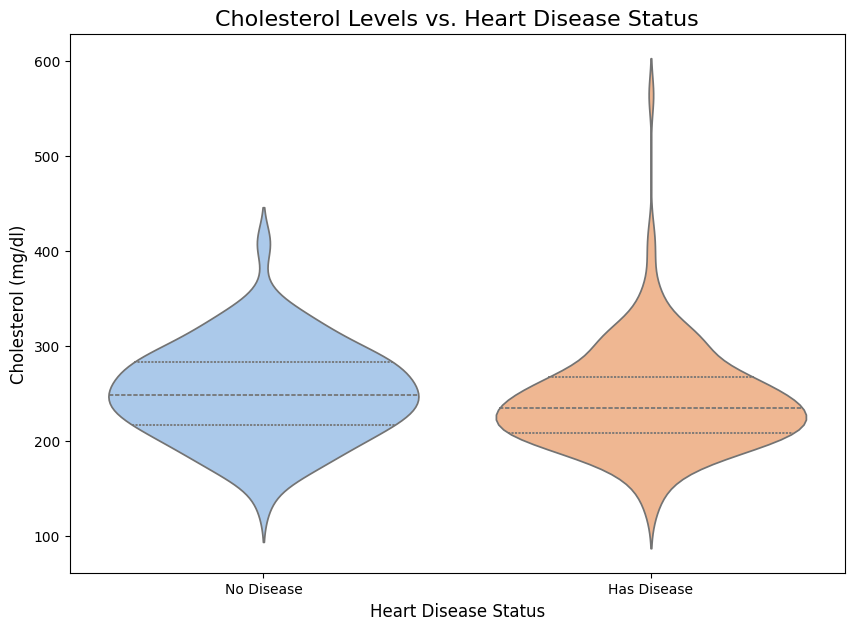

In [2]:
# --- Cholesterol vs. Heart Disease ---
plt.figure(figsize=(10, 7))
sns.violinplot(x='target', y='chol', data=df, palette='pastel', inner='quartile')
plt.title('Cholesterol Levels vs. Heart Disease Status', fontsize=16)
plt.xlabel('Heart Disease Status', fontsize=12)
plt.ylabel('Cholesterol (mg/dl)', fontsize=12)
plt.xticks([0, 1], ['No Disease', 'Has Disease'])
plt.savefig('../reports/figures/cholesterol_vs_heart_disease.png', bbox_inches='tight')
plt.show()

### 3. Peak Exercising (Maximum Heart Rate) vs. Heart Disease

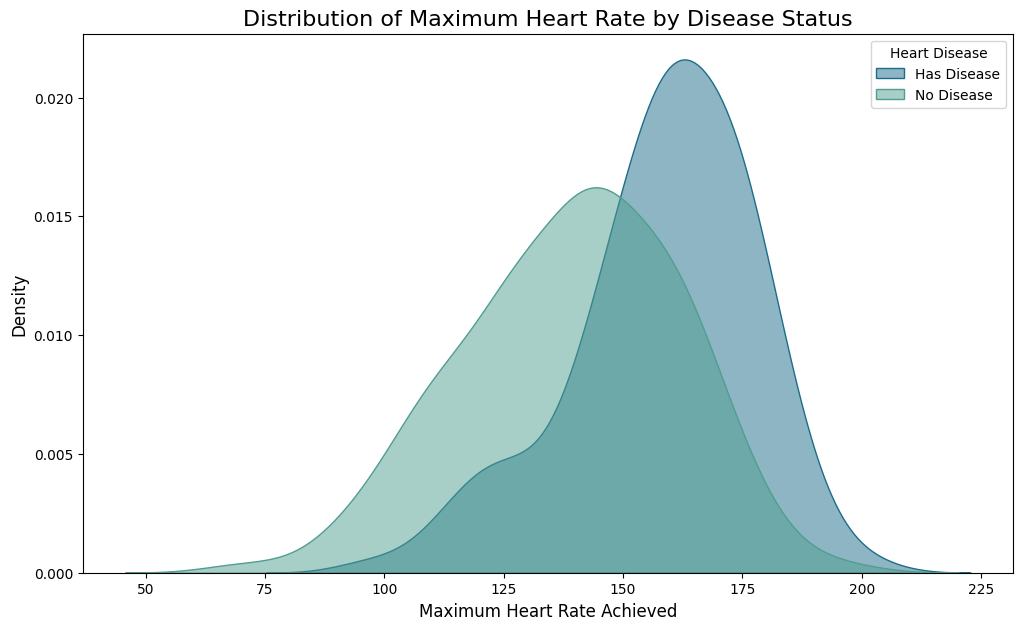

In [3]:
# --- Maximum Heart Rate vs. Heart Disease ---
plt.figure(figsize=(12, 7))
sns.kdeplot(data=df, x='thalach', hue='target', fill=True, common_norm=False, palette='crest', alpha=0.5)
plt.title('Distribution of Maximum Heart Rate by Disease Status', fontsize=16)
plt.xlabel('Maximum Heart Rate Achieved', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Heart Disease', labels=['Has Disease', 'No Disease'])
plt.savefig('../reports/figures/max_hr_vs_heart_disease.png', bbox_inches='tight')
plt.show()

### 4.  Thalassemia, Sex, and Heart Disease

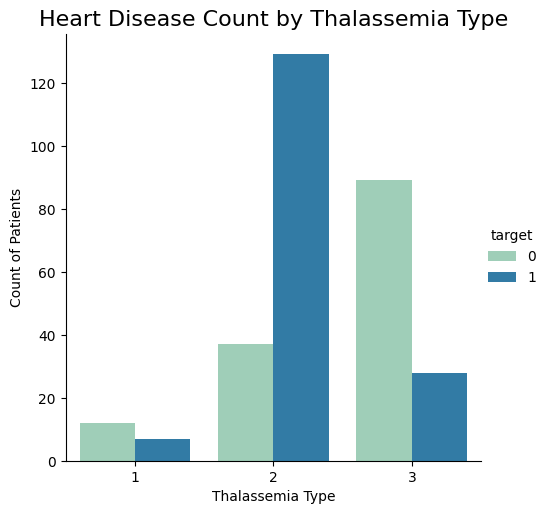

In [4]:
# This plot shows how thalassemia relates to heart disease, separated by gender.
sns.catplot(x='thal', kind='count', hue='target', data=df, palette='YlGnBu')
plt.title('Heart Disease Count by Thalassemia Type', fontsize=16)
plt.xlabel('Thalassemia Type')
plt.ylabel('Count of Patients')
plt.savefig('../reports/figures/thalassemia_analysis.png', bbox_inches='tight')
plt.show()

### 5. Pair Plot of Key Variables

Generating pair plot... (This may take a moment)


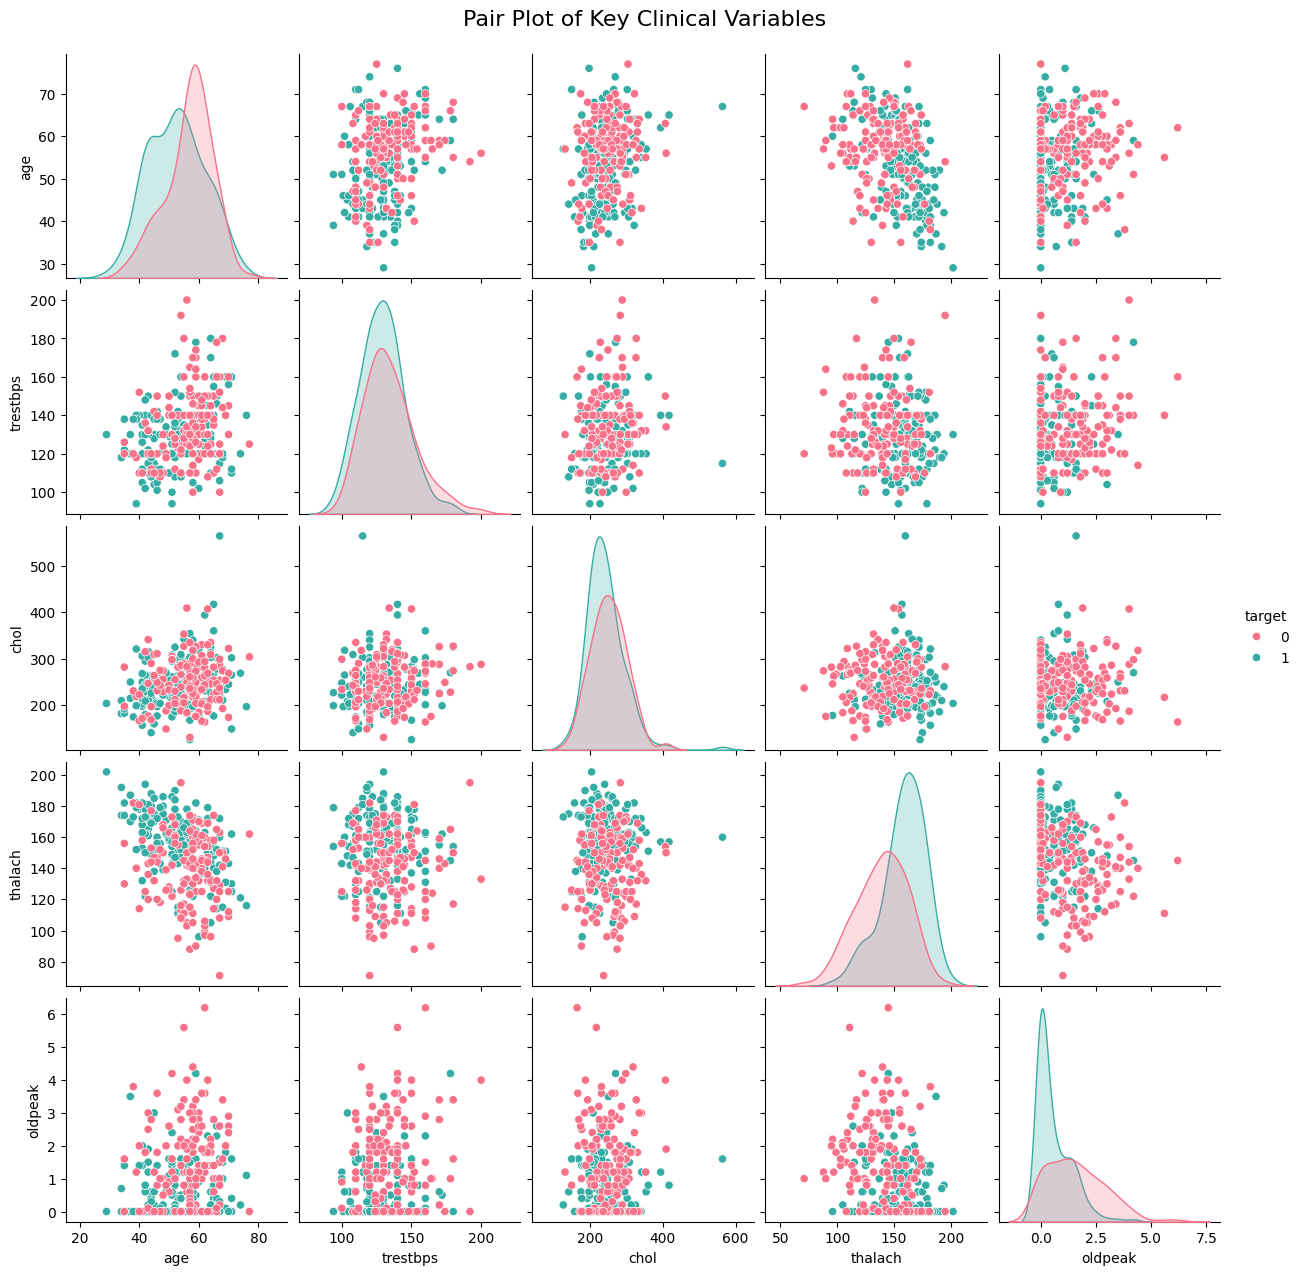

In [5]:
# We select a few key continuous variables plus the target for clarity.
key_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
print("Generating pair plot... (This may take a moment)")
sns.pairplot(df[key_vars], hue='target', palette='husl', diag_kind='kde')
plt.suptitle('Pair Plot of Key Clinical Variables', y=1.02, fontsize=16)
plt.savefig('../reports/figures/pairplot.png', bbox_inches='tight')
plt.show()

### 6. Modeling - Prepare Data

In [6]:
# --- Prepare Data for Modeling ---
# Define features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Scale numerical features. Since all our features are numerical, we can scale the whole set.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data has been split and scaled. Ready for modeling.")

Data has been split and scaled. Ready for modeling.


###  Hyperparameter Tuning

In [15]:
from sklearn.model_selection import GridSearchCV

# Example for RandomForest
param_grid = {'n_estimators': [100, 200], 'max_depth': [5, 10, None]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best parameters: {'max_depth': 5, 'n_estimators': 200}


### 7. Train and Evaluate Logistic Regression Model

Model Accuracy: 77.63%

--- Classification Report ---
                 precision    recall  f1-score   support

 No Disease (0)       0.80      0.69      0.74        35
Has Disease (1)       0.76      0.85      0.80        41

       accuracy                           0.78        76
      macro avg       0.78      0.77      0.77        76
   weighted avg       0.78      0.78      0.77        76


--- Confusion Matrix ---


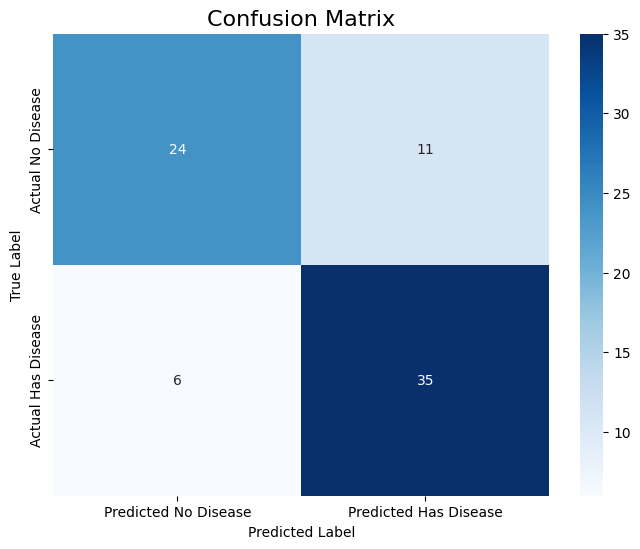

In [19]:
# --- Train and Evaluate Logistic Regression Model ---
# Initialize and train the model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# --- Evaluate the Model ---
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2%}\n")

print("--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['No Disease (0)', 'Has Disease (1)']))

# Visualize the Confusion Matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
        xticklabels=['Predicted No Disease', 'Predicted Has Disease'],
        yticklabels=['Actual No Disease', 'Actual Has Disease'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('../reports/figures/confusion_matrix_lr.png', bbox_inches='tight')
plt.show()

### 8. Train and Evaluate Random Forest Classifier

Model Accuracy: 78.95%

--- Classification Report ---
                 precision    recall  f1-score   support

 No Disease (0)       0.85      0.66      0.74        35
Has Disease (1)       0.76      0.90      0.82        41

       accuracy                           0.79        76
      macro avg       0.80      0.78      0.78        76
   weighted avg       0.80      0.79      0.79        76


--- Confusion Matrix ---


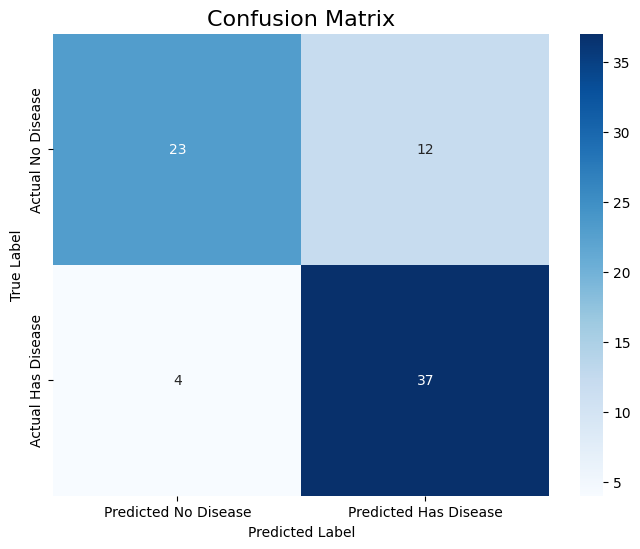

In [ ]:
# Initialize and train the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# --- Evaluate the Model ---
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2%}\n")

print("--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['No Disease (0)', 'Has Disease (1)']))

# Visualize the Confusion Matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
        xticklabels=['Predicted No Disease', 'Predicted Has Disease'],
        yticklabels=['Actual No Disease', 'Actual Has Disease'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('../reports/figures/confusion_matrix.png', bbox_inches='tight')
plt.show()

Training the final Tuned Random Forest model...
Model training complete.

--- Final Model Evaluation ---
Model Accuracy: 76.32%

--- Classification Report ---
                 precision    recall  f1-score   support

 No Disease (0)       0.81      0.63      0.71        35
Has Disease (1)       0.73      0.88      0.80        41

       accuracy                           0.76        76
      macro avg       0.77      0.75      0.75        76
   weighted avg       0.77      0.76      0.76        76


--- Confusion Matrix ---


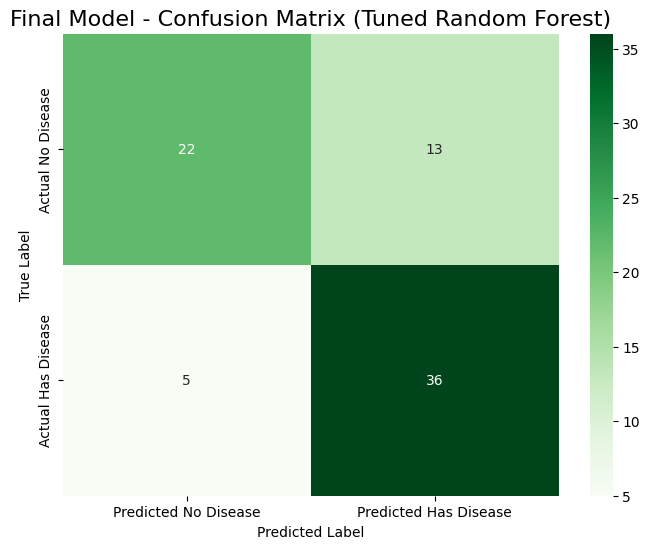

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# The best parameters you found from GridSearchCV
best_params = {'max_depth': 5, 'n_estimators': 200}

# 1. Initialize the model with the best parameters
# We use random_state for reproducibility.
final_model = RandomForestClassifier(
n_estimators=best_params['n_estimators'],
max_depth=best_params['max_depth'],
random_state=42
)

# 2. Train the final model on the scaled training data
# (Assuming X_train_scaled and y_train are already created from the previous cell)
print("Training the final Tuned Random Forest model...")
final_model.fit(X_train_scaled, y_train)
print("Model training complete.")

# 3. Make predictions on the scaled test data
y_pred_final = final_model.predict(X_test_scaled)

# 4. Evaluate the final model's performance
print("\n--- Final Model Evaluation ---")
print(f"Model Accuracy: {accuracy_score(y_test, y_pred_final):.2%}\n")

print("--- Classification Report ---")
print(classification_report(y_test, y_pred_final, target_names=['No Disease (0)', 'Has Disease (1)']))

# 5. Visualize the final Confusion Matrix
print("\n--- Confusion Matrix ---")
cm_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Greens', # Using a different color for the final model
        xticklabels=['Predicted No Disease', 'Predicted Has Disease'],
        yticklabels=['Actual No Disease', 'Actual Has Disease'])
plt.title('Final Model - Confusion Matrix (Tuned Random Forest)', fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Save the final confusion matrix plot
plt.savefig('../reports/figures/final_model_confusion_matrix.png', bbox_inches='tight')
plt.show()